In [1]:
import operator
import os
import numpy as np
import matplotlib.pyplot as plt
from defs import *
import model
from scipy.interpolate import make_interp_spline, BSpline
from PIL import Image

Read the data set

In [2]:
X_TRAIN, Y_TRAIN, X_TEST, Y_TEST = read_data()

Plot the data set:

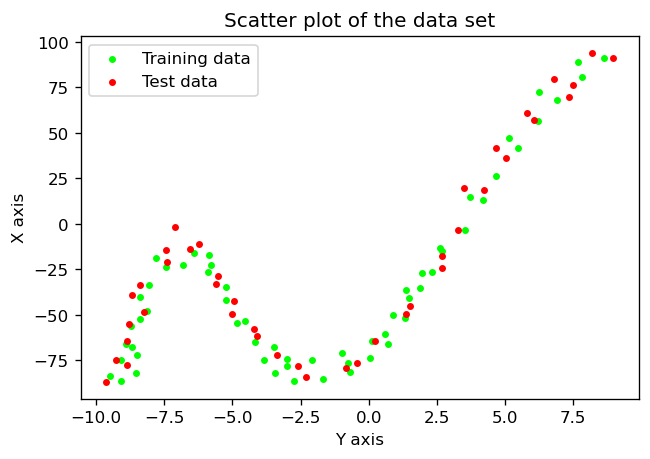

In [3]:
plt.figure(figsize=(6, 4), dpi=120)
plt.scatter(x=X_TRAIN, y=Y_TRAIN, s=10, c='#00FF00')
plt.scatter(x=X_TEST, y=Y_TEST, s=10, c='#FF0000')
plt.title("Scatter plot of the data set")
plt.ylabel("X axis")
plt.xlabel("Y axis")
plt.legend(labels=["Training data", "Test data"])
plt.show()

## PART A & B
Regress the training data using 512 units

NN w/ 1 Hidden Layer w/ 512 units...
Max epochs have been reached... w/ Loss = 5738.594576260496


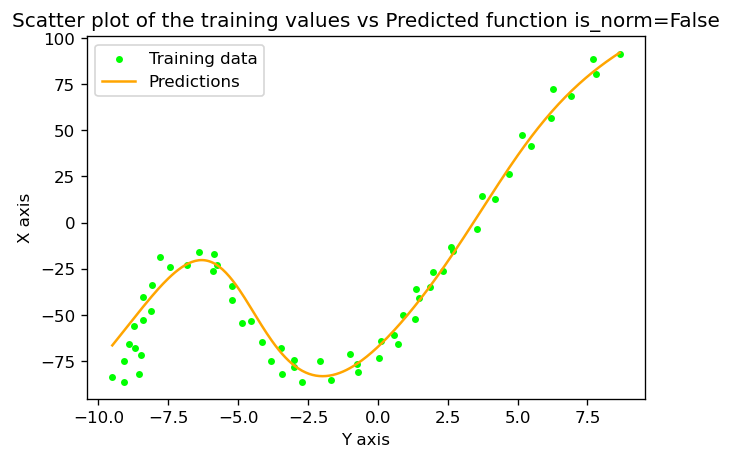

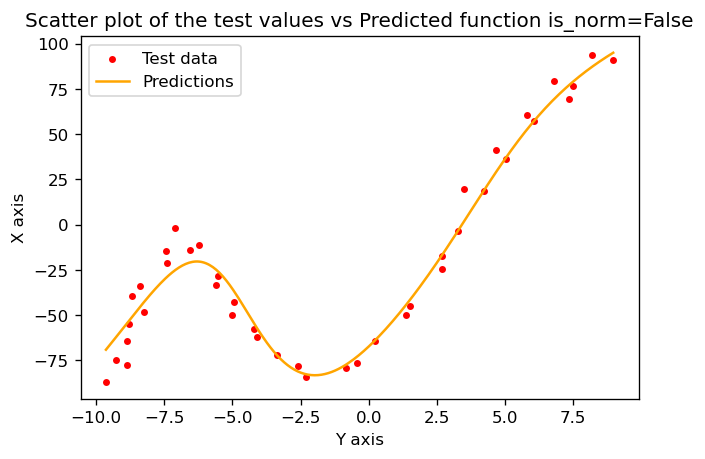

Training loss = 5738.594576260496
Test loss = 3670.5234328358874


In [4]:
artificial_nn = model.ANN(num_units=512, epochs=500000, learning_rate=5e-5, is_normalized=False, stop_M=3)
artificial_nn.train(X_TRAIN, Y_TRAIN)
y_predict_train, train_loss = artificial_nn.predict(X_TRAIN, Y_TRAIN)
y_predict_test, test_loss = artificial_nn.predict(X_TEST, Y_TEST)
plot_predictions(X_TRAIN, Y_TRAIN, y_predict_train, is_test=False, is_norm=False)
plot_predictions(X_TEST, Y_TEST, y_predict_test, is_test=True, is_norm=False)
print(f"Training loss = {train_loss}")
print(f"Test loss = {test_loss}")

Now, use no units at all, simple linear regression:

Using no hidden layers...
Epoch 3 have converged w/ Loss = 43.78355242517757
Max epochs have been reached... w/ Loss = 43.78355242517757


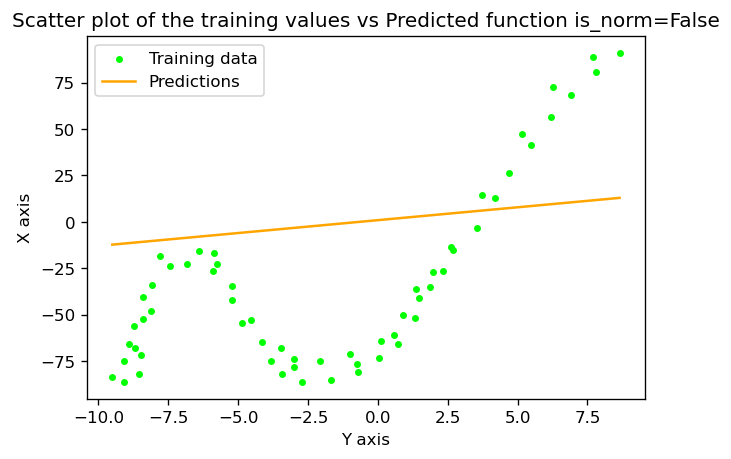

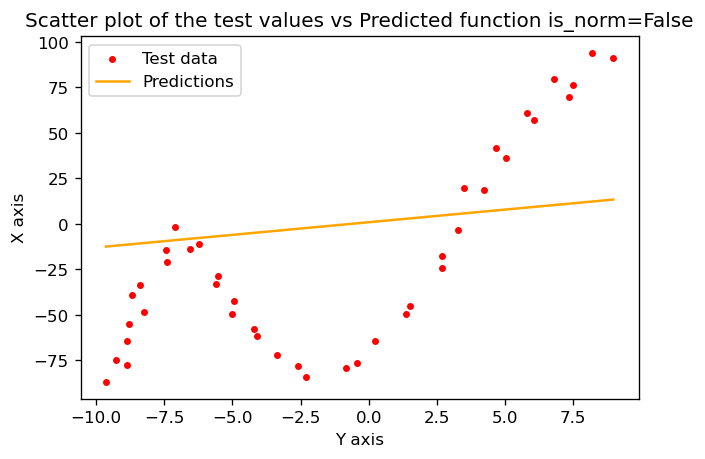

Training loss = 12035528.392224733
Test loss = 5388614.796500924


In [4]:
artificial_nn_linear = model.ANN(num_units=0, epochs=100000, learning_rate=5e-4, is_normalized=False, stop_M=3)
artificial_nn_linear.train(X_TRAIN, Y_TRAIN)
y_predict_train_linear, train_loss_linear = artificial_nn_linear.predict(X_TRAIN, Y_TRAIN)
y_predict_test_linear, test_loss_linear = artificial_nn_linear.predict(X_TEST, Y_TEST)
plot_predictions(X_TRAIN, Y_TRAIN, y_predict_train_linear, is_test=False, is_norm=False)
plot_predictions(X_TEST, Y_TEST, y_predict_test_linear, is_test=True, is_norm=False)
print(f"Training loss = {train_loss_linear}")
print(f"Test loss = {test_loss_linear}")

Now, use normalization

Using normalization...
NN w/ 1 Hidden Layer w/ 24 units...
Max epochs have been reached... w/ Loss = 5711.9913853503485
Using normalization while predicting...
Using normalization while predicting...


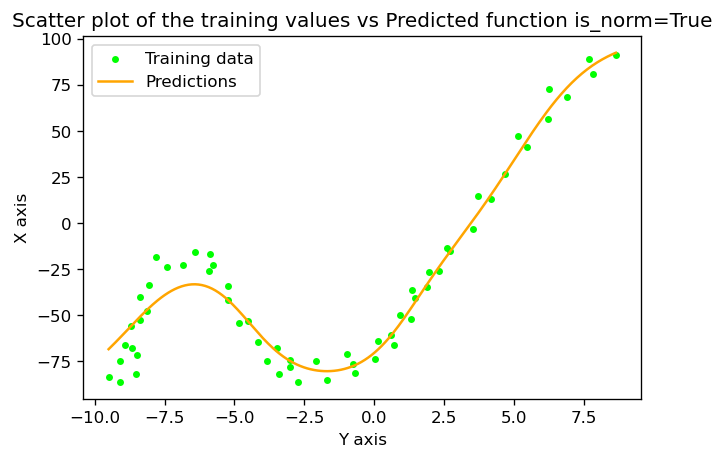

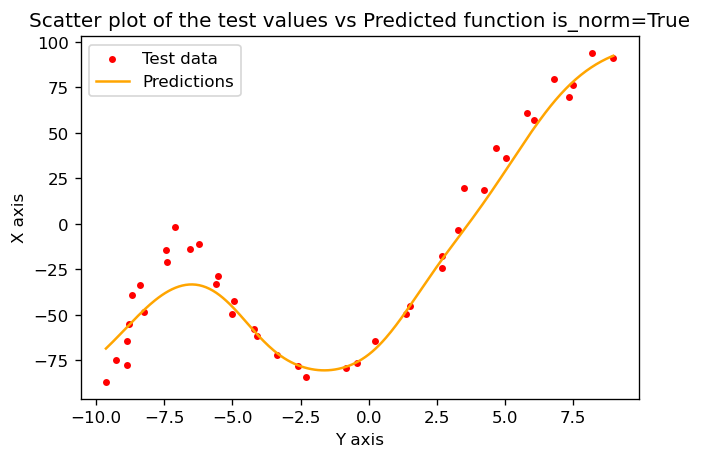

Training loss = 5711.9913853503485
Test loss = 5996.785914758124


In [8]:
is_normalized = True
artificial_nn_normalized = model.ANN(num_units=24, epochs=100000, learning_rate=5e-4, is_normalized=is_normalized, stop_M=3)
artificial_nn_normalized.train(X_TRAIN, Y_TRAIN)
y_predict_train_norm, train_loss_norm = artificial_nn_normalized.predict(X_TRAIN, Y_TRAIN)
y_predict_test_norm, test_loss_norm = artificial_nn_normalized.predict(X_TEST, Y_TEST)
plot_predictions(X_TRAIN, Y_TRAIN, y_predict_train_norm, is_test=False, is_norm=is_normalized)
plot_predictions(X_TEST, Y_TEST, y_predict_test_norm, is_test=True, is_norm=is_normalized)
print(f"Training loss = {train_loss_norm}")
print(f"Test loss = {test_loss_norm}")

## PART C
Use the following hyperparameters for the following 5 runs:<br>
<code>num_units = [2, 4, 8, 16, 32]
learning_rates = [5e-4, 5e-4, 5e-4, 5e-4, 5e-4]
stop_Ms = [3, 3, 3, 3, 3]
</code>
Then plot the training predictions as in previous part by using these hyperparameters only. However, arrange learning rates, initial weights, stopping conditions accordingly.<br>
Then, create two tables, for training loss and the test loss. Report the training loss averaged over training set instances and the standard deviation of this array, whose size is 5. Then, same for the test loss/ set.

Using normalization...
NN w/ 1 Hidden Layer w/ 2 units...
Max epochs have been reached... w/ Loss = 22401.19467410619
Using normalization while predicting...
Using normalization while predicting...


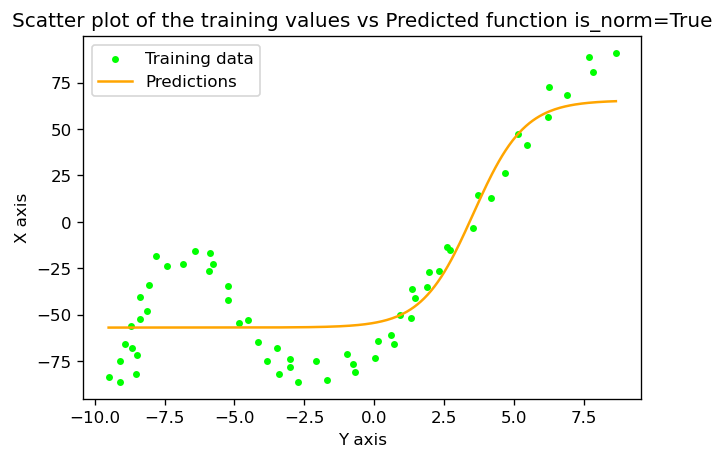

Using normalization...
NN w/ 1 Hidden Layer w/ 4 units...
Max epochs have been reached... w/ Loss = 20300.27186472775
Using normalization while predicting...
Using normalization while predicting...


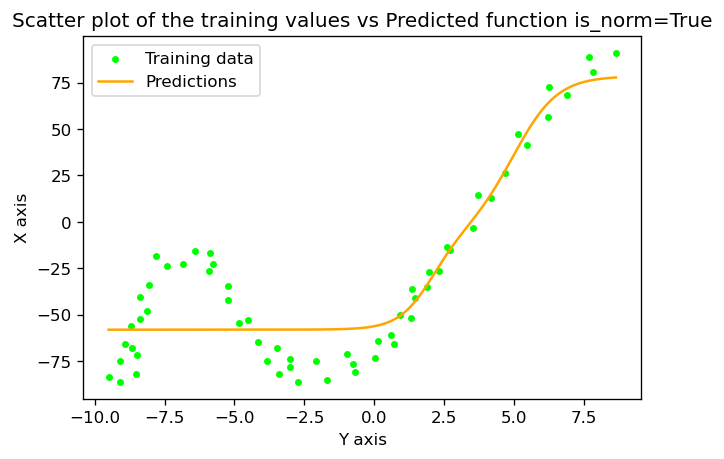

Using normalization...
NN w/ 1 Hidden Layer w/ 8 units...
Max epochs have been reached... w/ Loss = 20449.3759675732
Using normalization while predicting...
Using normalization while predicting...


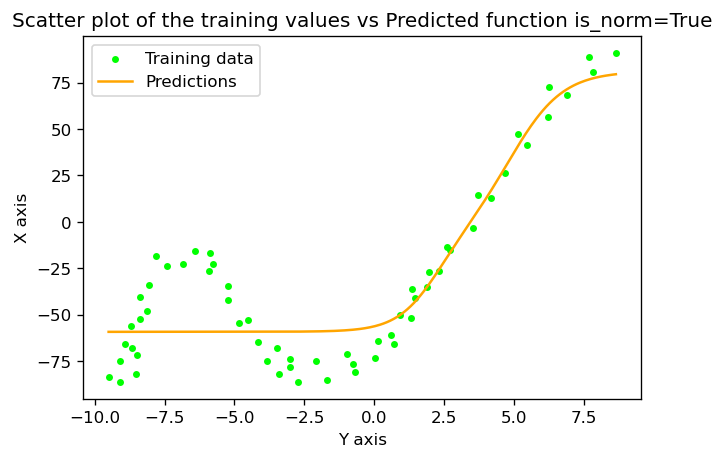

Using normalization...
NN w/ 1 Hidden Layer w/ 16 units...
Max epochs have been reached... w/ Loss = 3580.1357311797265
Using normalization while predicting...
Using normalization while predicting...


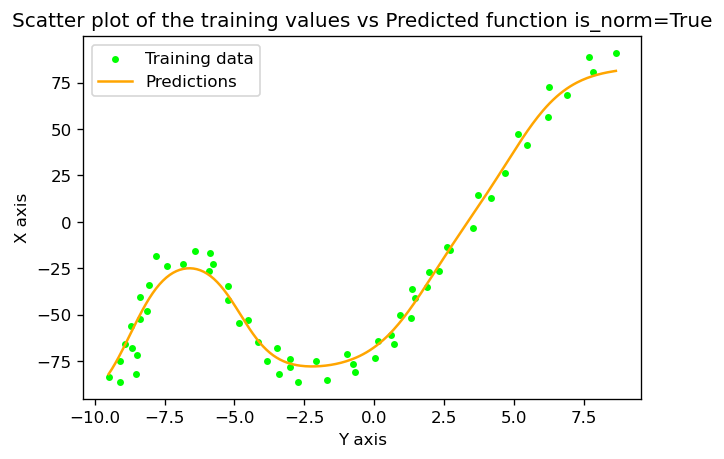

Using normalization...
NN w/ 1 Hidden Layer w/ 32 units...
Max epochs have been reached... w/ Loss = 7181.91050136477
Using normalization while predicting...
Using normalization while predicting...


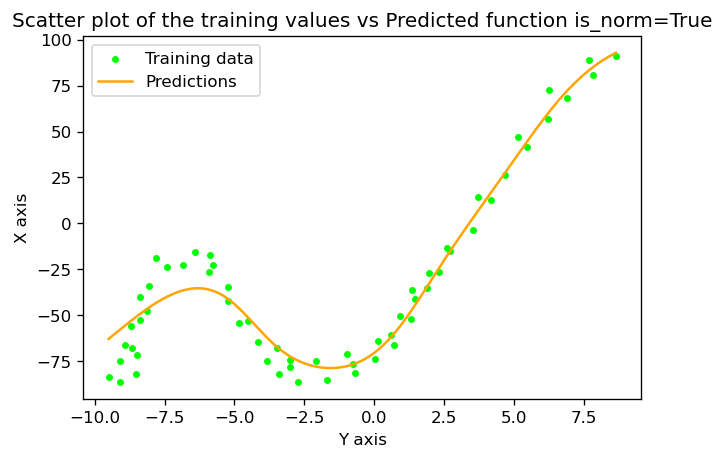

Training loss averaged over training instances = 14782.577747790327
Test loss averaged over test instances = 13729.883134115607
Standard deviation of the training losses = 7795.713232644921
Standard deviation of the test losses = 7008.365141999691


In [9]:
num_units = [2, 4, 8, 16, 32]
learning_rates = [5e-4, 5e-4, 5e-4, 5e-4, 5e-4]
stop_Ms = [3, 3, 3, 3, 3]
is_normalized = True
train_losses = []
test_losses = []
plots = []
for i in range(5):
    artificial_nn_part_c = model.ANN(num_units=num_units[i], epochs=100000, learning_rate=learning_rates[i], is_normalized=is_normalized, stop_M=stop_Ms[i])
    artificial_nn_part_c.train(X_TRAIN, Y_TRAIN)
    y_predict_train_part_c, train_loss_part_c = artificial_nn_part_c.predict(X_TRAIN, Y_TRAIN)
    y_predict_test_part_c, test_loss_part_c = artificial_nn_part_c.predict(X_TEST, Y_TEST)

    # Plot the predictions for the training set
    plot_predictions(X_TRAIN, Y_TRAIN, y_predict_train_part_c, is_test=False, is_norm=is_normalized, show=True)
    # plots.append(plot)

    # Record the losses
    train_losses.append(train_loss_part_c)
    test_losses.append(test_loss_part_c)

    artificial_nn_part_c = None
# plots = np.array(plots)
# disp_plots = display_blocks(plots)
# Image.fromarray(disp_plots).show()
train_losses = np.array(train_losses)
test_losses = np.array(test_losses)

train_losses_mean = float(np.mean(train_losses))
test_losses_mean = float(np.mean(test_losses))

train_losses_std = float(np.var(train_losses)) ** 0.5
test_losses_std = float(np.var(test_losses)) ** 0.5

print(f"Training loss averaged over training instances = {train_losses_mean}")
print(f"Test loss averaged over test instances = {test_losses_mean}")
print(f"Standard deviation of the training losses = {train_losses_std}")
print(f"Standard deviation of the test losses = {test_losses_std}")